<a href="https://colab.research.google.com/github/AdrianGuel/CryptoForecast/blob/main/maticdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pysindy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import solve_ivp
from scipy.io import loadmat
import pandas as pd
from pysindy.utils import linear_damped_SHO
from pysindy.utils import cubic_damped_SHO
from pysindy.utils import linear_3D
from pysindy.utils import hopf
from pysindy.utils import lorenz

import pysindy as ps

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
np.random.seed(1000)  # Seed for reproducibility

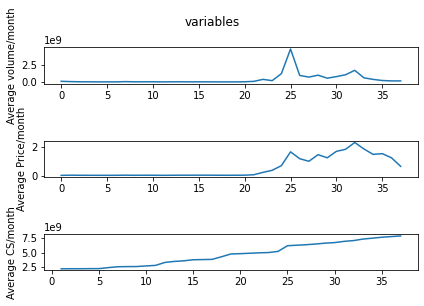

In [ ]:
# Generate training data
df = pd.read_csv('datamatic.csv')
df["Real Volume"] = df["Real Volume"].fillna(0)
df["Price (Close)"] = df["Price (Close)"].fillna(0)
volume=np.flip(df.loc[:,"Real Volume"].to_numpy())
Price=np.flip(df.loc[:,"Price (Close)"].to_numpy())
date=np.flip(df.loc[:,"Date"].to_numpy())
CS=np.flip(df.loc[:,"Circulating Supply"].to_numpy())

Mv=[]
Mp=[]
Mcs=[]
for i in range(30,len(volume),30):
  Mv.append(np.mean(volume[i-30:i]))
  Mp.append(np.mean(Price[i-30:i]))
  Mcs.append(np.mean(CS[i-30:i]))
fig, axs = plt.subplots(3)
fig.suptitle('variables')
axs[0].plot(Mv)
axs[1].plot(Mp)
axs[2].plot(Mcs)
axs[0].set_ylabel('Average volume/month')
axs[1].set_ylabel('Average Price/month')
axs[2].set_ylabel('Average CS/month')
fig.tight_layout()
plt.show()